# Homework 1 (100 points)

This homework focuses on the pandas library and clustering. There are no python library restrictions for this homework. Suggested libraries are pandas, numpy, regex, and sklearn.

## Exercise 1 (60 points)

This exercise will use the [Titanic dataset](https://www.kaggle.com/c/titanic/data) (https://www.kaggle.com/c/titanic/data). Download the file named `train.csv` and place it in the same folder as this notebook.

The goal of this exercise is to practice using [pandas](https://pypi.org/project/pandas/) methods. If your:

1. code is taking a long time to run
2. code involves for loops or while loops
3. code spans multiple lines (except for `e` and `m`)

look through the pandas documentation for alternatives. This [cheat sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf) may come in handy.

a) Write a function that reads in a filepath to a csv and returns the DataFrame. (5 points)

In [ ]:
import pandas as pd

df = pd.read_csv('train.csv')
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


b) Write a function that returns the number of rows that have at least one empty column value - (2.5 points)

In [ ]:
def num_nans(df):
    return df.isnull().sum().sum()

print("there are " +  str(num_nans(df)) + " rows with at least one empty value")

there are 708 rows with at least one empty value


c) Write a function that removes all columns with more than 200 NaN values - (2.5 points)

In [ ]:
def drop_na(df):
    return df.dropna(axis = 1, thresh = df.shape[0] - 200)

df = drop_na(df)
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

d) Write a function that replaces `male` with 0 and `female` with 1 - (2.5 points)

In [ ]:

def to_numerical(df):
    return df['Sex'].apply({'female':1, 'male':0}.get)

df['Sex'] = to_numerical(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


e)  Write a function that adds four columns `First Name`, `Middle Name`, `Last Name`, and `Title` corresponding to the value in the `name` column. - (5 points) 

For example: `Braund, Mr. Owen Harris` would be: 

|First Name | Middle Name | Last Name | Title |
|-----------|-------------|-----------|-------|
| Owen      |  Harris     |  Braund   | Mr    |

In [ ]:
import re

def func(row):
    row[2] = row[1][0]
    if row[2] == 'the':
        row[2] = 'the Countess. of'
        row[4] = '(Lucy Noel Martha Dyer-Edwards)'
    else:
        row[3] = row[1][1] if row[1][1][0] != "(" else None
        row[4] = ' '.join(row[1][1:]) if row[3] == None else ' '.join(row[1][2:])
    return row


def extract_names(df):

    new_df = df.copy(deep = True)
    splitString = new_df.Name.str.split(", ")
    new_df['Name'] = splitString
    new_df = pd.DataFrame(new_df["Name"].to_list(), columns=['Last Name', 'Name'])
    splitTitle = new_df.Name.str.split(" ")
    new_df['Name'] = splitTitle
    new_df['Title'] = None
    new_df['First Name'] = None
    new_df['Middle Name'] = None
    new_df = new_df.apply(func, axis = 1)

    return new_df[['First Name', 'Middle Name', 'Last Name', 'Title']]


df[['First Name', 'Middle Name', 'Last Name', 'Title']] = extract_names(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,First Name,Middle Name,Last Name,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,Owen,Harris,Braund,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,John,Bradley (Florence Briggs Thayer),Cumings,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,Laina,,Heikkinen,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,Jacques,Heath (Lily May Peel),Futrelle,Mrs.
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,William,Henry,Allen,Mr.


f) Write a function that replaces all missing ages with the average age - (2.5 points)

In [ ]:
def replace_with_mean(df):
    get_mean = df['Age'].mean()
    df['Age'].fillna((get_mean), inplace=True)
    return df['Age']

df['Age'] = replace_with_mean(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,First Name,Middle Name,Last Name,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,Owen,Harris,Braund,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,John,Bradley (Florence Briggs Thayer),Cumings,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,Laina,,Heikkinen,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,Jacques,Heath (Lily May Peel),Futrelle,Mrs.
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,William,Henry,Allen,Mr.


The next set of questions focus on visualization. Please use pandas and [matplotlib](https://pypi.org/project/matplotlib/) for all plotting.

g) Plot a bar chart of the average age of those that survived and did not survive. Briefly comment on what you observe. - (2.5 points)

Survived
0    30.415100
1    28.549778
Name: Age, dtype: float64


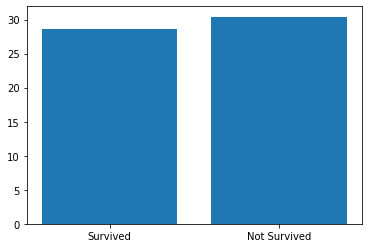

In [ ]:
import matplotlib.pyplot as plt

splitVals = df.groupby('Survived').Age.mean()
print(splitVals)
surv = ['Survived', 'Not Survived']
age = [splitVals[1], splitVals[0]]
plt.bar(surv, age)
plt.show()

-> your answer here

h) Plot a bar chart of the proportion that survived for male and female. Briefly comment on what you observe. - (2.5 points)

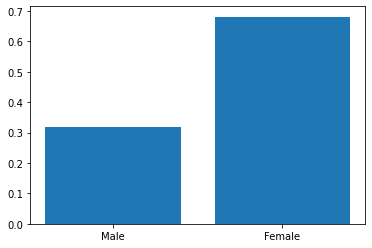

In [ ]:
import matplotlib.pyplot as plt

splitVals = df.groupby('Survived').Sex.sum()
survived = df.groupby('Survived').Sex.count()[1]
femaleSurvived = splitVals[1]
maleSurvived = survived - femaleSurvived
surv = ['Male', 'Female']
gender = [maleSurvived / survived, femaleSurvived / survived]
plt.bar(surv, gender)
plt.show()


 We notice that a much larger proportion of females survived than men. This may show that females were prioritized over the men. 

i) Plot a bar chart of the proportion that survived for each title. Briefly comment on what you observe. - (5 points)

<BarContainer object of 17 artists>

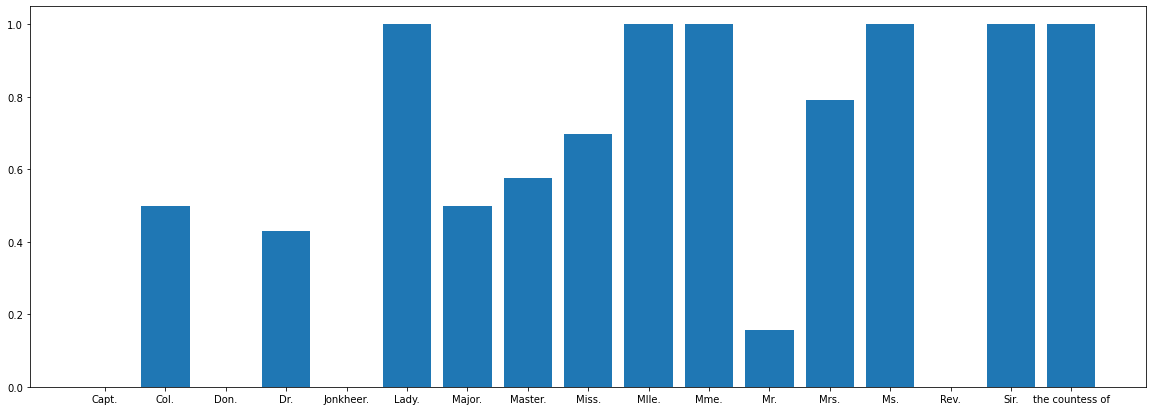

In [ ]:
all = df.groupby('Title').Survived.count()
survived = df.groupby('Title').Survived.sum()
prop = survived / all
titles = ['Capt.', 'Col.', 'Don.', 'Dr.', 'Jonkheer.', 'Lady.', 'Major.', 'Master.', 'Miss.', 'Mlle.', 'Mme.', 'Mr.', 'Mrs.', 'Ms.', 'Rev.', 'Sir.', 'the countess of']
plt.figure(figsize=(20,7))
plt.bar(titles, list(prop))

We notice again that the lady titles have significantly higher survival rates than that of their male counterparts. For example, between Mr. and Ms. and Mrs. we see that Mr. is by far the worst. 

j) Plot a bar chart of the average fare for those that survived and those that did not survive. Briefly comment on what you observe. - (5 points)

<AxesSubplot:xlabel='Survived'>

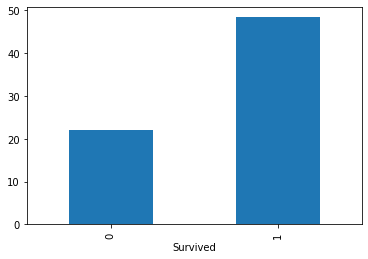

In [ ]:
# plot bar chart of the average fare of those who survived and those who did not
df.groupby('Survived')['Fare'].mean().plot(kind='bar')

-> your answer here

k) Create a boxplot for the fare of those that survived and those that did not survive. Briefly comment on what you observe. - (5 points)

<AxesSubplot:title={'center':'Fare'}, xlabel='Survived'>

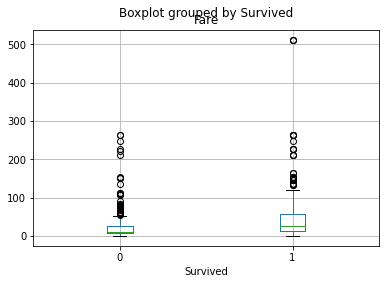

In [ ]:
# plot boxplot for the fare of those who survived and those who did not
df.boxplot(column='Fare', by='Survived')

-> your answer here

k2) Create a function to subtract the mean fare from the actual fare then divide by the standard deviation - (2.5 points)

In [ ]:
# replace fare column with a function to subtract mean fare from each fare divided by standard deviation

def normalize_fare(df):
    return (df['Fare'] - df['Fare'].mean()) / df['Fare'].std()

df['Fare'] = normalize_fare(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,First Name,Middle Name,Last Name,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,-0.502163,S,Owen,Harris,Braund,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,0.786404,C,John,Bradley (Florence Briggs Thayer),Cumings,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,-0.488580,S,Laina,,Heikkinen,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,0.420494,S,Jacques,Heath (Lily May Peel),Futrelle,Mrs.
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,-0.486064,S,William,Henry,Allen,Mr.


l) Remove all non-numerical columns from the dataframe. - (2.5 points)

In [ ]:
new_df = df._get_numeric_data()
new_df = new_df.dropna()
# We will be dropping all NA as the euclidean distance will be affected. 
new_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,0,22.0,1,0,-0.502163
1,2,1,1,1,38.0,1,0,0.786404
2,3,1,3,1,26.0,0,0,-0.488580
3,4,1,1,1,35.0,1,0,0.420494
4,5,0,3,0,35.0,0,0,-0.486064


m) Ignoring passenger ID, write a function that returns the names of the N most similar **pairs** of passengers using the euclidean distance and ignoring pairs that have distance zero - (15 points)

In [ ]:
def euclidean_distance(v1, v2):
    sub = [(v1[i] - v2[i]) ** 2 for i in range(len(v1))]
    return sum(sub) ** 0.5
def function(row):
    row[18] = euclidean_distance(list(row[1:8]), list(row[10:17]))
    return row

def N_most_similar_pairs(dataframe, N):
    dataframe['Name'] = df['Name']
    new_df = dataframe.merge(dataframe, how = "cross")
    new_df = new_df[new_df['PassengerId_x']!= new_df['PassengerId_y']]
    new_df['Euclid Distance'] = None
    new_df = new_df.apply(function, axis = 1)
    answer = new_df.nsmallest(N, 'Euclid Distance')

    return answer[['Name_x', 'Name_y']]

names = N_most_similar_pairs(new_df, 3)

In [ ]:
names.head()

,Name_x,Name_y
4178,"Allen, Mr. William Henry","Brocklebank, Mr. William Alfred"
23520,"Emir, Mr. Farred Chehab","Yousif, Mr. Wazli"
23688,"Emir, Mr. Farred Chehab","Lahoud, Mr. Sarkis"


## Exercise 2 (40 points)

This exercise will be using the [mnist dataset](http://yann.lecun.com/exdb/mnist/) and challenge your understanding of clustering and kmeans.

a) Using Kmeans, cluster the images using 10 clusters and plot the centroid of each cluster. Hint: the centroid of the cluster has the same dimensions as the images in the dataset. - (10 points)

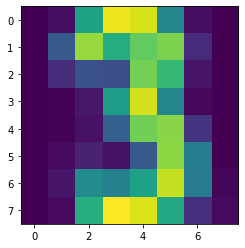

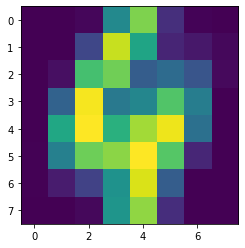

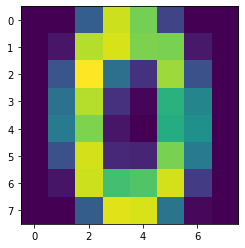

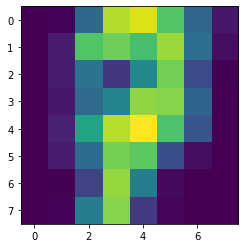

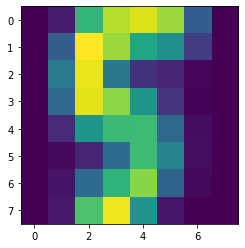

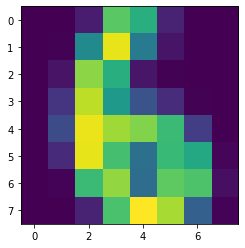

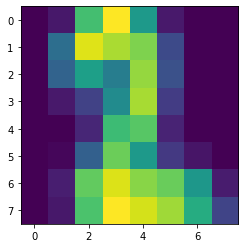

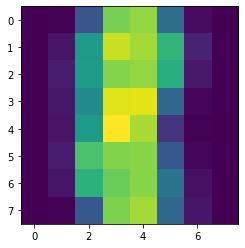

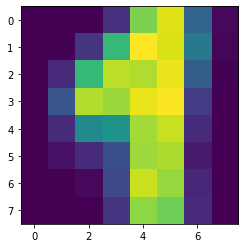

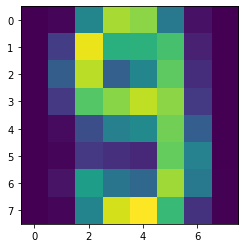

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import load_digits

mnist = load_digits()

data = mnist['data']

# cluster the 10 images using kmeans
kmeans = KMeans(n_clusters=10).fit(data)
label = kmeans.predict(data)
cent = kmeans.cluster_centers_
cent = cent.reshape(10, 8, 8)


for i in cent:
    plt.figure()
    plt.imshow(i)
    plt.show()

b) Each of the images has a label corresponding to the digit that the image represents. These labels generate a clustering of the images where all images of digit 1 for example are in cluster labeled `1`. Compare the [silhouette scores](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) of the clustering you created above to those of the clustering generated from the labels attached to each image. Explain - (10 points)

In [ ]:
# compare the sillhouette score of the clustering created above to those of the clustering generated from the labels attached to each image
from sklearn.metrics import silhouette_score
print("The silhouette score of the clustering created above is: " + str(silhouette_score(data, label)))


The silhouette score of the clustering created above is: 0.18218940161026864


c) Download the CIFAR-10 dataset [here](https://www.cs.toronto.edu/~kriz/cifar.html). Open `batch_1` by following the documentation on the web page. Plot a random image from the dataset. - (5 points)

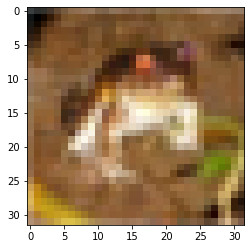

In [ ]:
# plot a random image from dataset cifar-10 saved in the file cifar-10-python.tar.gz
import tarfile
import pickle
import matplotlib.pyplot as plt

# open the tar file
tar = tarfile.open('cifar-10-python.tar.gz', 'r:gz')

# load the data
data = pickle.load(tar.extractfile('cifar-10-batches-py/data_batch_1'), encoding='latin1')

# plot random image
plt.imshow(data['data'][0].reshape(3, 32, 32).transpose(1, 2, 0))
plt.show()

d) This image is 32 x 32 = 1024 pixels and each pixel is a 3-dimensional object of RGB (Red, Green, Blue) intensities. So, in a way, we have a dataset of 1024 3-dimensional data points. By applying Kmeans to this dataset, we are clustering for similar colors (so all the blues might be in the same cluster etc.). The centroid of each cluster will also be an RGB color. We can then replace every pixel in the original image with the centroid of the cluster it was assigned to, thus only using K colors to recreate the image.

Using the same image as in c), produce an image that only uses 4 colors (the 4 centroids of the clusters obtained by clustering the image itself using Kmeans). - (10 points)

For example, if the original image is the following:

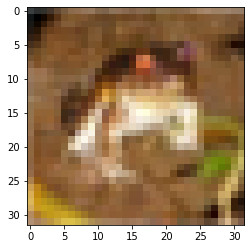

In [ ]:
from IPython.display import Image
Image(filename="frog.png", width=300, height=300)

The transformation, using only 4 colors / centroids would look like:

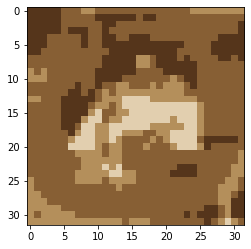

In [ ]:
Image(filename="frog_4.png", width=300, height=300)

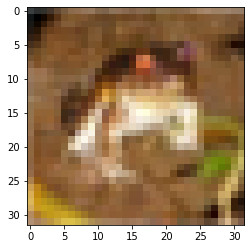

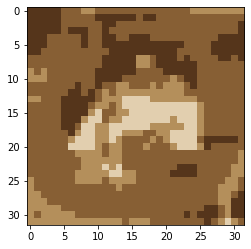

In [ ]:
# using the image above, produce image that only uses 4 colors
from sklearn.cluster import KMeans
import numpy as np

# reshape the image into a 2D array
image = data['data'][0].reshape(3, 32, 32).transpose(1, 2, 0)
img_2d = image.reshape(32*32, 3)

# cluster the image using kmeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(img_2d)
img_2d_compressed = kmeans.cluster_centers_[kmeans.predict(img_2d)]

# reshape the image back into its original shape
compressed = img_2d_compressed.reshape(32, 32, 3)


plt.figure()
plt.imshow(image)
plt.show()

plt.figure()
plt.imshow(compressed.astype(np.uint8))
plt.show()

e) From the code above, write a function that can handle any number of chosen colors. Demonstrate it working on the same picture using 2 colors and 10 colors. - (5pts)

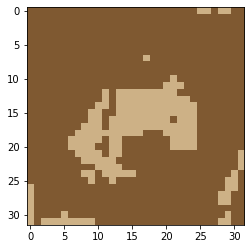

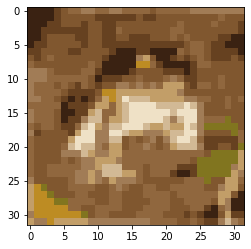

In [ ]:
# write a function that can handle any number of chosen colors
# demonstarte the function on the image above using 2 colors and 10 colors
def compress_image(image, n_colors):
    # reshape the image into a 2D array
    img_2d = image.reshape(32*32, 3)

    # cluster the image using kmeans
    kmeans = KMeans(n_clusters=n_colors)
    kmeans.fit(img_2d)
    img_2d_compressed = kmeans.cluster_centers_[kmeans.predict(img_2d)]

    # reshape the image back into its original shape
    compressed = img_2d_compressed.reshape(32, 32, 3)
    
    return compressed

# 2 colors
compressed = compress_image(image, 2)
plt.figure()
plt.imshow(compressed.astype(np.uint8))
plt.show()

# 10 colors
compressed = compress_image(image, 10)
plt.figure()
plt.imshow(compressed.astype(np.uint8))
plt.show()
